In [13]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

from datetime import timedelta
import datetime

In [14]:
air_ml_df = pd.read_csv(os.path.join("weekly_air_data.csv"))

In [15]:
air_ml_df.head(5)

,Unnamed: 0,air_area_name,visitors,current_week
0,0,Tōkyō-to Minato-ku Shibakōen,2069,0
1,1,Tōkyō-to Minato-ku Shibakōen,2092,1
2,2,Tōkyō-to Minato-ku Shibakōen,2095,2
3,3,Tōkyō-to Minato-ku Shibakōen,1999,3
4,4,Tōkyō-to Minato-ku Shibakōen,1983,4


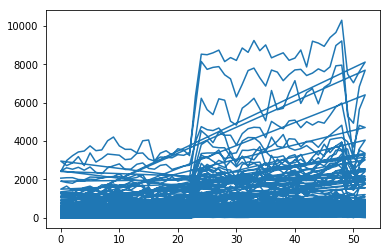

In [73]:
y = air_ml_df["visitors"]
x = air_ml_df["current_week"]

plt.plot(x,y)

In [17]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
air_ml_df["air_area_name"] = number.fit_transform(air_ml_df["air_area_name"].astype('str'))

new_ml_df = air_ml_df[["air_area_name","current_week","visitors"]]
len(new_ml_df["air_area_name"])

5459

In [18]:
air_uni = list(new_ml_df["air_area_name"].unique())


In [20]:
new_ml_df["1_week_ago_visitors"] = 0
for x in range(len(new_ml_df["air_area_name"])):
    for air_id in air_uni:
        if(new_ml_df["air_area_name"][x] == air_id):
            if x > 0:
                new_ml_df["1_week_ago_visitors"][x] = new_ml_df["visitors"][x-1]
new_ml_df.head(5)

,air_area_name,current_week,visitors,1_week_ago_visitors
0,62,0,2069,0
1,62,1,2092,2069
2,62,2,2095,2092
3,62,3,1999,2095
4,62,4,1983,1999


In [27]:
new_ml_df["1_week_ago_diff_1_week_ago_visitors"] = new_ml_df["visitors"] - new_ml_df["1_week_ago_visitors"]

In [28]:
new_ml_df.head(10)

,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
0,62,0,2069,0,2069
1,62,1,2092,2069,23
2,62,2,2095,2092,3
3,62,3,1999,2095,-96
4,62,4,1983,1999,-16
5,62,5,2127,1983,144
6,62,6,2118,2127,-9
7,62,7,2085,2118,-33
8,62,8,2121,2085,36
9,62,9,2157,2121,36


In [29]:
clean_ml_df = new_ml_df.drop(0)

In [31]:
clean_ml_df.head(5)

,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
1,62,1,2092,2069,23
2,62,2,2095,2092,3
3,62,3,1999,2095,-96
4,62,4,1983,1999,-16
5,62,5,2127,1983,144


In [62]:
week_one_clean_ml_df = clean_ml_df.loc[clean_ml_df["current_week"] == 1]
no_zeroes_clean_ml_df = week_one_clean_ml_df.loc[week_one_clean_ml_df["visitors"] != 0]
no_zeroes_clean_ml_df

,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
1,62,1,2092,2069,23
54,75,1,178,175,3
107,37,1,835,768,67
160,0,1,2987,2416,571
213,29,1,567,586,-19
266,74,1,2724,2958,-234
319,58,1,796,670,126
372,39,1,213,217,-4
425,77,1,2609,2446,163
478,27,1,790,797,-7


In [81]:
features = ['air_area_name','current_week','1_week_ago_diff_1_week_ago_visitors']
X = no_zeroes_clean_ml_df[list(features)].values
y = no_zeroes_clean_ml_df['visitors'].values
y = y.reshape(-1,1)
y.shape
X.shape

(82, 3)

In [100]:
week_three_clean_ml_df = clean_ml_df.loc[clean_ml_df["current_week"] == 3]
no_zeroes_three_clean_ml_df = week_three_clean_ml_df.loc[week_three_clean_ml_df["visitors"] != 0]
no_zeroes_three_clean_ml_df.head(5)

,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
3,62,3,1999,2095,-96
56,75,3,146,121,25
109,37,3,990,887,103
162,0,3,3433,3238,195
215,29,3,595,606,-11


In [101]:
features = ['air_area_name','current_week','1_week_ago_diff_1_week_ago_visitors']
X_3 = no_zeroes_three_clean_ml_df[list(features)].values
y_3 = no_zeroes_three_clean_ml_df['visitors'].values
y_3 = y_3.reshape(-1,1)
y_3.shape
X_3.shape

(82, 3)

In [102]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_train = X
y_train = y
### END SOLUTION

X_test = X_3
y_test = y_3

In [103]:
# Transform the training and testing data using the X_scaler and y_scaler models


In [104]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

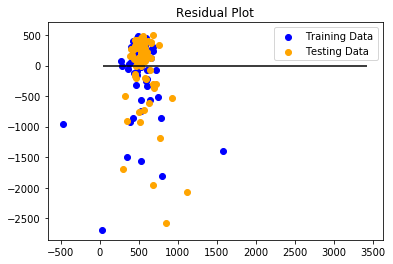

In [105]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test)
# model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [106]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 358978.20940046385, R2: 0.16908299941274307


In [107]:
#2 timeshift 2
# new_ml_df["2_week_ago_visitors"] = 0
# for x in range(len(new_ml_df["air_area_name"])):
#     for air_id in air_uni:
#         if(new_ml_df["air_area_name"][x] == air_id):
#             if x > 0:
#                 new_ml_df["2_week_ago_visitors"][x] = new_ml_df["1_week_ago_visitors"][x-1]
# new_ml_df.head(5)

In [45]:
# new_ml_df["2_week_ago_diff_2_week_ago_visitors"] = new_ml_df["2_week_ago_visitors"] - new_ml_df["1_week_ago_visitors"]

In [46]:
# new_ml_df.head(10)